In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/Users/lijianxi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#You need to change the root at here
df=pd.read_csv('/Users/lijianxi/Downloads/ATM.csv')
#it's a database about 5 ATM and their transaction performance during the last 6 years;
# from 1/1/2011 to 9/29/2017

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
atm_name                        11589 non-null object
transaction_date                11589 non-null object
no_of_withdrawals               11589 non-null int64
no_of_cub_card_withdrawals      11589 non-null int64
no_of_other_card_withdrawals    11589 non-null int64
total_amount_withdrawn          11589 non-null int64
amount_withdrawn_cub_card       11589 non-null int64
amount_withdrawn_other_card     11589 non-null int64
weekday                         11589 non-null object
festival_religion               11589 non-null object
working_day                     11589 non-null object
holiday_sequence                11589 non-null object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [4]:
#clean the data
df1=df.drop_duplicates()
df2=df1.dropna()
#Drop the duplication and the rows that contains NULL data
df=df2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11589 entries, 0 to 11588
Data columns (total 12 columns):
atm_name                        11589 non-null object
transaction_date                11589 non-null object
no_of_withdrawals               11589 non-null int64
no_of_cub_card_withdrawals      11589 non-null int64
no_of_other_card_withdrawals    11589 non-null int64
total_amount_withdrawn          11589 non-null int64
amount_withdrawn_cub_card       11589 non-null int64
amount_withdrawn_other_card     11589 non-null int64
weekday                         11589 non-null object
festival_religion               11589 non-null object
working_day                     11589 non-null object
holiday_sequence                11589 non-null object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [5]:
df.head()
#check the data at the head

,atm_name,transaction_date,no_of_withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card,weekday,festival_religion,working_day,holiday_sequence
0,Big Street ATM,1/1/11,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/11,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/11,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/11,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/11,74,25,49,287700,148200,139500,Saturday,C,H,WHH


In [6]:
#At first there exist Saturday and saturday
#so we need to uni the format
df.weekday=df.weekday.str.lower()

In [7]:
df.head()

,atm_name,transaction_date,no_of_withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card,weekday,festival_religion,working_day,holiday_sequence
0,Big Street ATM,1/1/11,50,20,30,123800,41700,82100,saturday,H,H,WHH
1,Mount Road ATM,1/1/11,253,67,186,767900,270900,497000,saturday,C,H,WHH
2,Airport ATM,1/1/11,98,56,42,503400,347700,155700,saturday,C,H,WHH
3,KK Nagar ATM,1/1/11,265,159,106,945300,532600,412700,saturday,C,H,WHH
4,Christ College ATM,1/1/11,74,25,49,287700,148200,139500,saturday,C,H,WHH


In [8]:
df.describe()

,no_of_withdrawals,no_of_cub_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_cub_card,amount_withdrawn_other_card
count,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,123.341099,67.567694,55.773406,5.223059e+05,3.345604e+05,1.877455e+05
std,67.315288,47.849517,38.506475,3.248167e+05,2.470771e+05,1.502351e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000e+00
25%,79.000000,34.000000,25.000000,3.057000e+05,1.560000e+05,7.910000e+04
50%,115.000000,57.000000,50.000000,4.700000e+05,2.816000e+05,1.586000e+05
75%,158.000000,87.000000,78.000000,6.716000e+05,4.485000e+05,2.560000e+05
max,491.000000,345.000000,310.000000,2.549800e+06,1.907800e+06,1.472600e+06


In [9]:
df.shape

(11589, 12)

In [13]:
df['weekday'].value_counts()

sunday       2686
saturday     1649
tuesday      1502
wednesday    1462
monday       1458
thursday     1420
friday       1412
Name: weekday, dtype: int64

In [14]:
sns.countplot(x="weekday", data=df, palette="Greens_d")

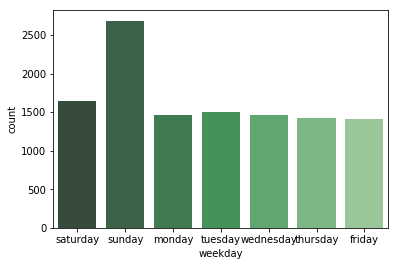

In [15]:
plt.show()

From this chart, we can see that the distribution of the ATM using between different weekdays.
And Sunday is the most popular day of using the ATM, and Saturday is second popular day. Maybe they are the holidays so people will take some cash on this two days.

In [ ]:
#We are going to research the pair of data in the dataset, so I am going to show the pair plot

In [21]:
sns.pairplot(df)
# to look at that if there are some relationship between the columns

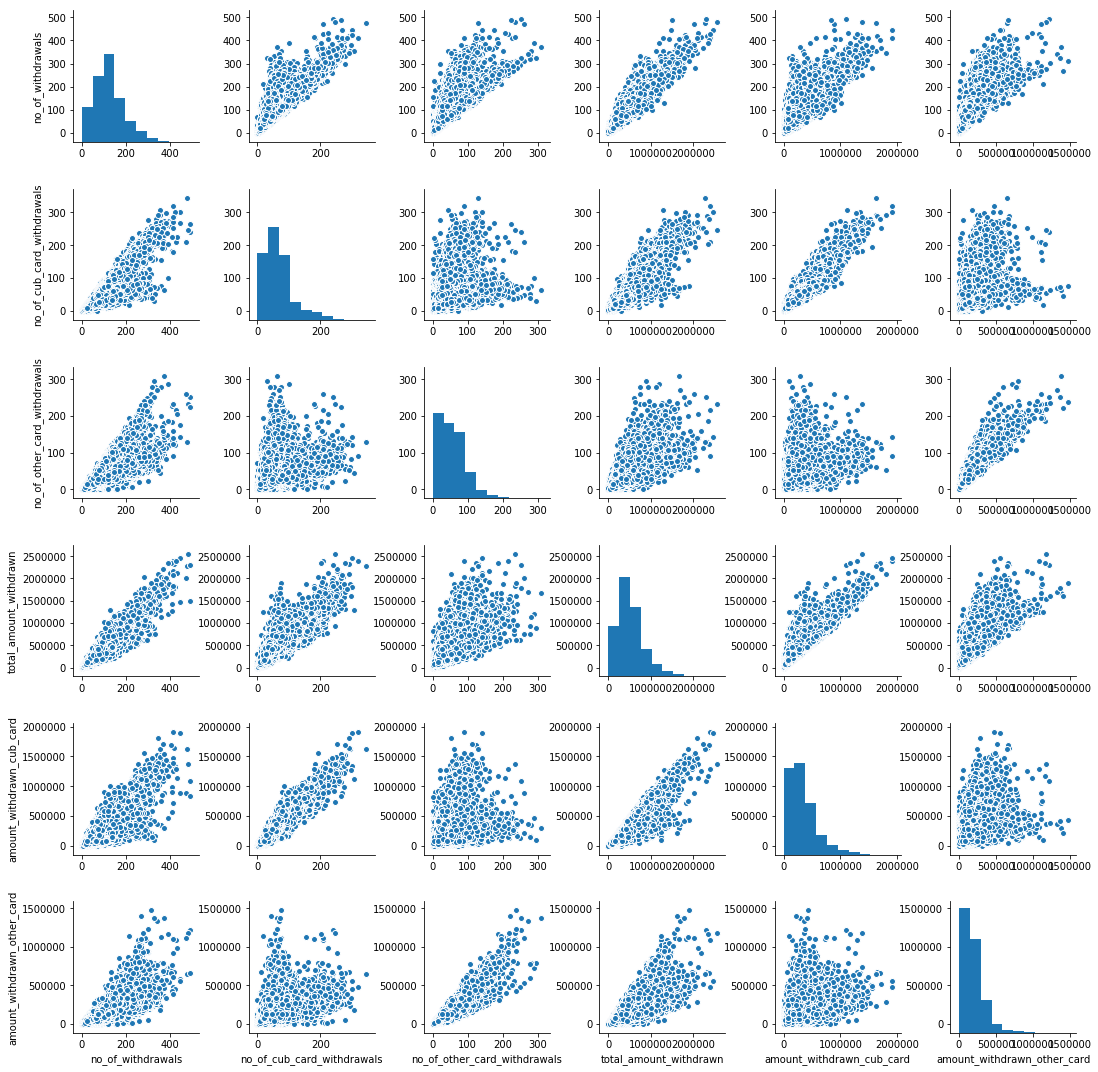

In [22]:
plt.show()

Above this pair chart, we can see that some of the data set have correlation while others not.
So, we will continue study the pairs which seems like they have correlations.
Such as: no_of_cub_card_withdrawals and amount_withdrawn_cub_card
and      no_of_withdrawals and total_amount_withdrawn
also we will research the relationship between no_of_cub_card_withdrawn and no_of_withdrawals

In [25]:
sns.regplot(x="amount_withdrawn_cub_card", y="no_of_cub_card_withdrawals", data=df)

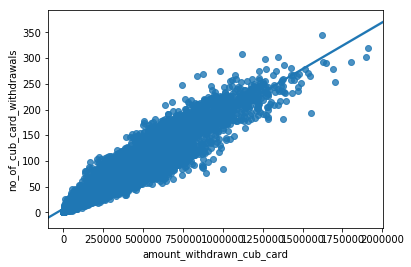

In [26]:
plt.show()

In [27]:
sns.jointplot(x="amount_withdrawn_cub_card", y="no_of_cub_card_withdrawals", data=df, kind="reg")

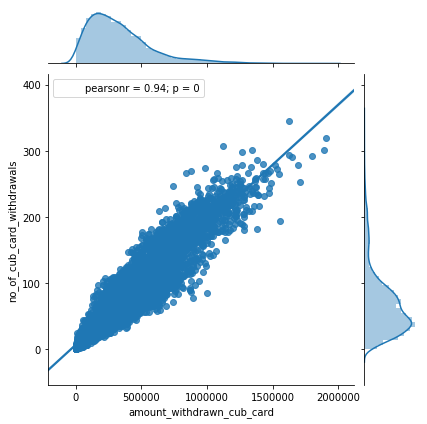

In [28]:
plt.show()

In this chart, we can see that they have a liner correlation between 
x="amount_withdrawn_cub_card", y="no_of_cub_card_withdrawals"

In [36]:
sns.jointplot(x="total_amount_withdrawn", y="no_of_withdrawals", data=df, kind="reg")

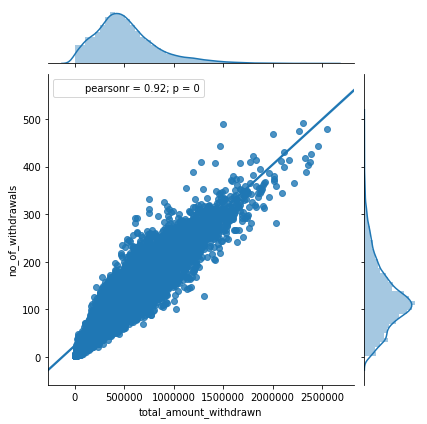

In [37]:
plt.show()

In this chart, we can see that they have a liner correlation between 
x="total_amount_withdrawn", y="no_of_withdrawals"

In [41]:
sns.jointplot(x="no_of_cub_card_withdrawals", y="no_of_withdrawals", data=df, kind="reg")

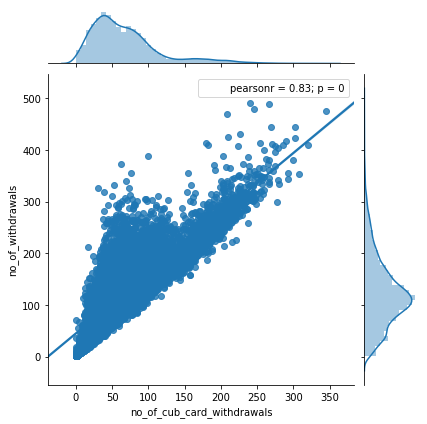

In [42]:
plt.show()

Also we can see that the times of withdrawals of cub card have a liner relationship with 
total amount of withdrawals

In [43]:
sns.lmplot(x="no_of_withdrawals", y="total_amount_withdrawn", hue="weekday", data=df)

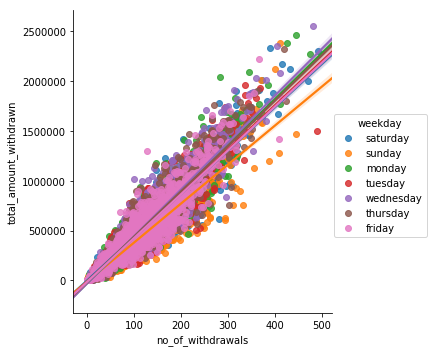

In [44]:
plt.show()

By seperated different weekday, we can see the customers' preference:
The amount of money the customer they take each time is differnet depend on which weekday the go  to take the money. 
In this chart, it shows that people who take money on Sunday will take less amount than other weekday for each time. 

In [45]:
sns.lmplot(x="no_of_withdrawals", y="total_amount_withdrawn", hue="atm_name", data=df)

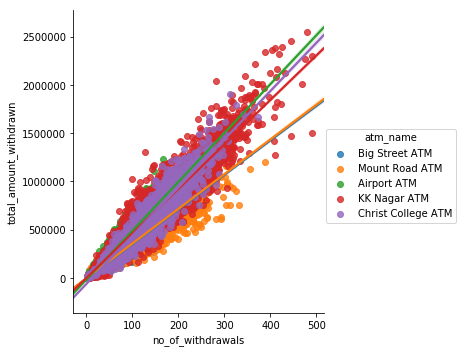

In [46]:
plt.show()

#According to the Slope
And in this chart, we can see that in different ATM, customers have different prefference of taking money each time. 
The Big Street ATM and Mount Road ATM have the similar preference, maybe they have the similar location: all near the road. So customer will just take fewer money each time.
While at Airport ATM, customers prefer to take more money each time, maybe they are going to traveling so they need more cash?


In [62]:
sns.boxplot(x="total_amount_withdrawn", y="atm_name", data=df)

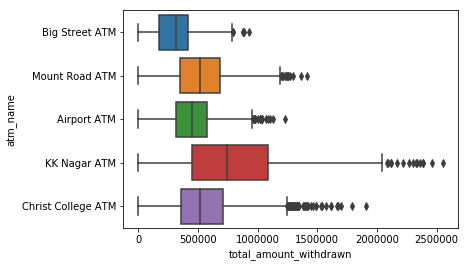

In [63]:
plt.show()

In this chart, we find that the average total amount withdrawn are different, and the KK Nagar 
ATM own the most amount and the lagest variety. And the Big Street ATM's daily total average amonut is at least.
#From this chart, the bank can know how much money they should allocate on each ATM.


In [64]:
sns.boxplot(x="no_of_withdrawals", y="atm_name", data=df)

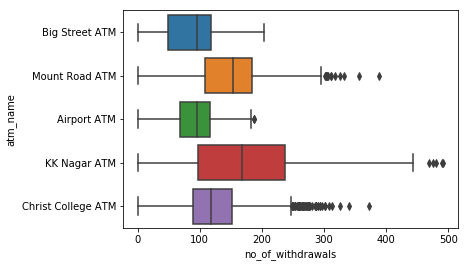

In [65]:
plt.show()

From the two boxplot above, we can find that customers who use the ATM most and take the most amount money from the ATM have a preference of using the KK Nagar ATM. So, KK Nagar ATM is a hotspot.  

In [67]:
sns.barplot(x="atm_name", y="no_of_withdrawals", hue="weekday", data=df)

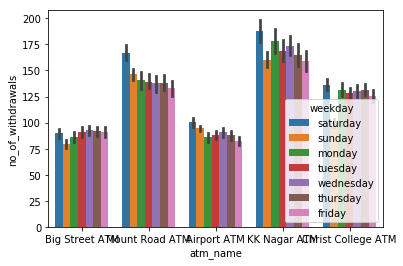

In [68]:
plt.show()

In [71]:
sns.barplot(x="atm_name", y="no_of_withdrawals", hue="working_day", data=df)

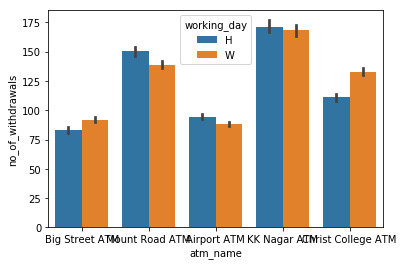

In [72]:
plt.show()

In this chart, we compare the working day and the holiday impact to different ATM.
In Mount Road ATM,Airport ATM and KK Nagar ATM, the no_of withdrawals increase in holiday.
However, in Christ College, the ATM have great impact by non-working day. It also means that there are fewer customers in college while the holiday.

In [79]:
sns.pointplot(x="weekday", y="no_of_withdrawals", hue="atm_name", data=df)

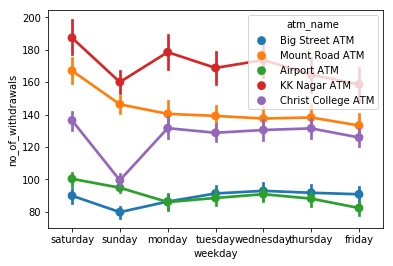

In [80]:
plt.show()

In this chart, we can see the different weekday will have impact to the no_of_withdrawals to all the ATM. Especially on Sunday at Christ College, maybe the Students have come home.

In [81]:
sns.pointplot(x="working_day", y="no_of_withdrawals", hue="atm_name", data=df)

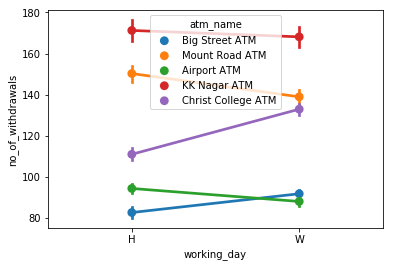

In [82]:
plt.show()

In this chart, we compare the working day and the holiday impact to different ATM.
In Mount Road ATM,Airport ATM and KK Nagar ATM, the no_of withdrawals increase in holiday.
However, in Christ College, the ATM have great impact by non-working day. It also means that there are fewer customers in college while the holiday.

In [85]:
sns.pointplot(x="holiday_sequence", y="no_of_withdrawals", hue="atm_name", data=df)

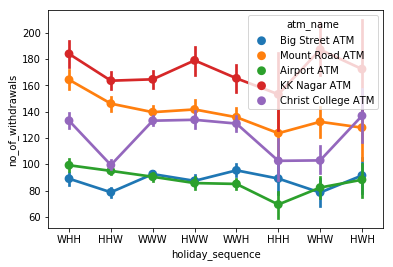

In [86]:
plt.show()

The day is at the middle, such WHW means: today is holiday between workdays.
In this chart, we can see how the holiday_sequence impact the ATM's no_of_withdrawals:
1.During the long holidays such as "HHH", all the ATM get the low record of transaction. 
2.The Christ College ATM get most impact by Holiday, especially at the end of a long holiday.


In [87]:
sns.pointplot(x="holiday_sequence", y="total_amount_withdrawn", hue="atm_name", data=df)

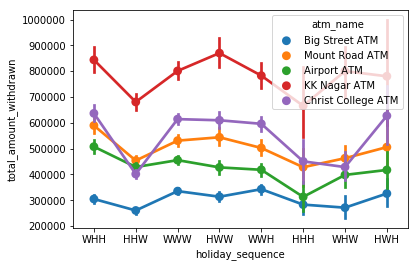

In [88]:
plt.show()

In [103]:
df2=df

In [110]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[[ 'total_amount_withdrawn','amount_withdrawn_cub_card', 'no_of_withdrawals','no_of_cub_card_withdrawals']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

                            total_amount_withdrawn  amount_withdrawn_cub_card  \
total_amount_withdrawn                    1.000000                   0.897033   
amount_withdrawn_cub_card                 0.897033                   1.000000   
no_of_withdrawals                         0.916664                   0.767584   
no_of_cub_card_withdrawals                0.843602                   0.936311   

                            no_of_withdrawals  no_of_cub_card_withdrawals  
total_amount_withdrawn               0.916664                    0.843602  
amount_withdrawn_cub_card            0.767584                    0.936311  
no_of_withdrawals                    1.000000                    0.828651  
no_of_cub_card_withdrawals           0.828651                    1.000000  


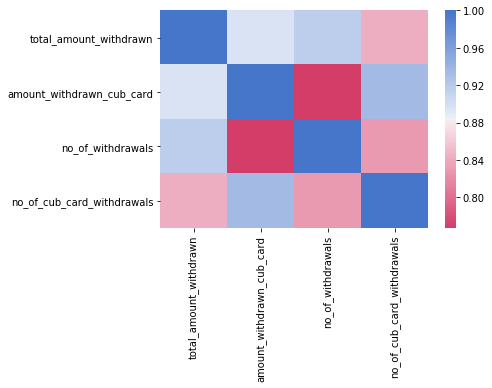

In [111]:
plt.show()

In this chart, we can assume that no_of_cub_card_withdrawals have only loose correlation with no_of_withdrawals